In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
data= pd.read_csv('ORL/pokemon_data_clean.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [67]:
data.drop(['Name','Type 1','Type 2'], axis=1, inplace=True)
data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,0
1,2,60,62,63,80,80,60,1,0
2,3,80,82,83,100,100,80,1,0
3,3,80,100,123,122,120,80,1,0
4,4,39,52,43,60,50,65,1,0


In [68]:
np.random.seed(0)
Model = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Legendary'], axis=1), data['Legendary'], test_size=0.2)
X_train.describe(), X_train.shape

(                #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
 count  640.000000  640.000000  640.000000  640.000000  640.000000  640.000000   
 mean   358.984375   68.242188   78.259375   73.054688   71.721875   71.126563   
 std    206.805965   24.608848   32.670474   30.708766   32.834972   27.057660   
 min      1.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
 25%    175.750000   50.000000   53.000000   50.000000   45.750000   50.000000   
 50%    356.500000   65.000000   75.000000   69.000000   65.000000   67.000000   
 75%    534.250000   80.000000  100.000000   90.000000   92.250000   89.250000   
 max    721.000000  250.000000  190.000000  230.000000  194.000000  160.000000   
 
             Speed  Generation  
 count  640.000000  640.000000  
 mean    68.448437    3.296875  
 std     29.254972    1.655641  
 min     10.000000    1.000000  
 25%     45.000000    2.000000  
 50%     65.000000    3.000000  
 75%     90.000000    5.00000

# Making predictions
* predict()
* predict_proba()

In [69]:
# Model.predict([[1,2,3,4,5,6,7,8]])  does not work
Model.fit(X_train, y_train)
y_preds= Model.predict(X_test)

In [70]:
np.array(y_test)

a=np.sum(y_preds)
b=np.sum(np.array(y_test)) 
b-a , np.mean(y_preds - np.array(y_test)), Model.score(X_test, y_test)


(8, -0.05, 0.95)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.95

In [72]:
# predict_proba
# returns the probability of a sample belonging to each class in the model
Model.predict_proba(X_test[:25]) # [no, yes]

array([[1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.91, 0.09],
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.51, 0.49],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.32, 0.68],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.68, 0.32]])

# evaluation
* sklearn.metrics
1. estimator score()
2. `scoring` parameter or `cross validation`
3. metric functions

https://scikit-learn.org/0.15/modules/model_evaluation.html

In [73]:
Model.score(X_test, y_test)  # will be 1 for train data, 1 on test data is overfitting or something is wrong

0.95

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(Model, X_train, y_train,cv=5,scoring=None)   # score based on 5 different version of data    none uses default score of model
print(f"score is {np.mean(cross_val_score(Model, X_train, y_train))* 100 :.2f}%")

score is 95.47%


<img src="cv.png">

# model evaluation metrics
1. accuracy
2. area under ROC
3. confusion matrix
4. classification report

In [75]:
cross_val_score(Model, X_train, y_train,cv=5,scoring='accuracy')


array([0.9453125, 0.9765625, 0.9453125, 0.953125 , 0.9375   ])

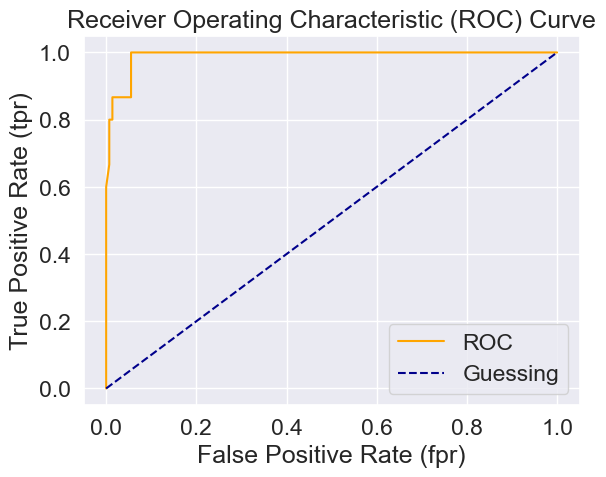

In [76]:
# receiver operating characteristic curve (ROC)
# ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)
from sklearn.metrics import roc_curve
y_probs = Model.predict_proba(X_test)
positive_probs = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)

import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


In [77]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, positive_probs)  # area under yellow curve

# area under curve is 1 for perfect model, 0.5 for guessing, 0 for inverse model  



0.9905747126436781

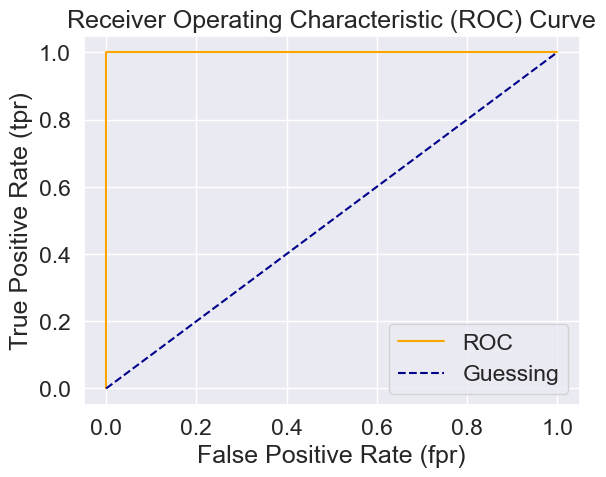

In [78]:
fpr,tpr,thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [79]:
# confusion matrix
#predicts how often a model is getting confused (compare predictions to actual)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)
#[[true negative, false positive],
# [false negative, true positive]]

array([[145,   0],
       [  8,   7]], dtype=int64)

In [80]:
pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,145,0,145
1,8,7,15
All,153,7,160


<img src="cnf.png" >

<Axes: >

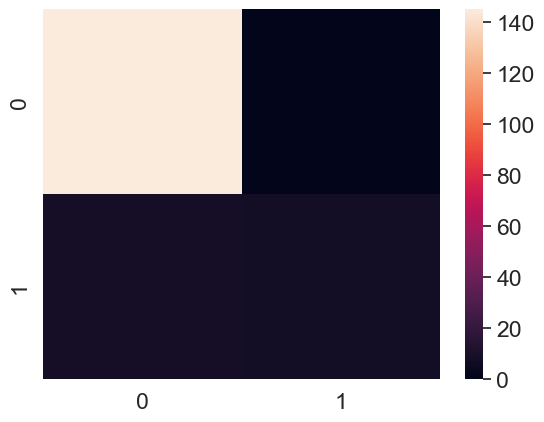

In [81]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, y_preds))
 

`import sys`
* import sys to access system

`!conda install --yes --prefix {sys.prefix} seaborn`  
* --prefix <"path">

! <- run bash command

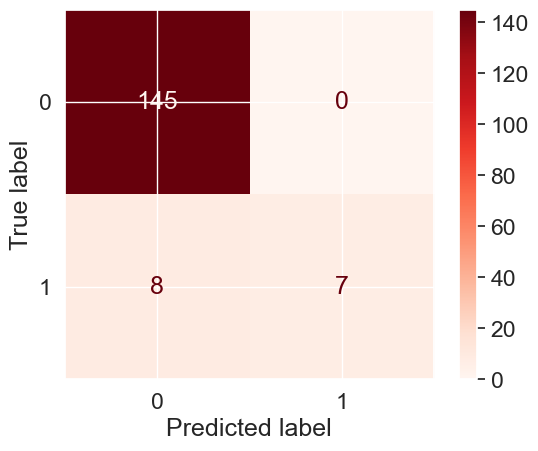

In [82]:
#using sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test, cmap=plt.cm.Reds)

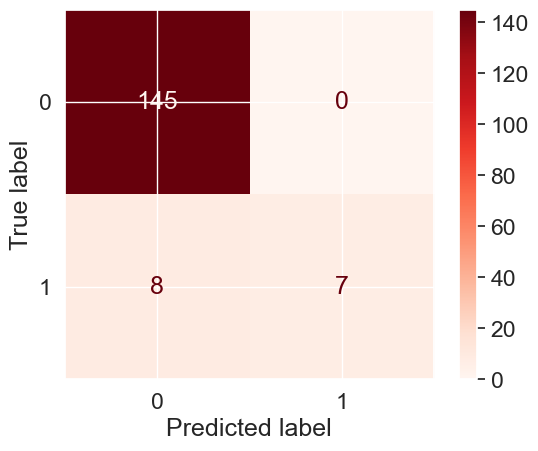

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap=plt.cm.Reds) 

In [84]:
# classification report (collection of metrics)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       145
           1       1.00      0.47      0.64        15

    accuracy                           0.95       160
   macro avg       0.97      0.73      0.80       160
weighted avg       0.95      0.95      0.94       160



<img src="clr.png">

# if class is imbalanced, accuracy is not a good metric

# summary of classification metrics
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.


.
.
#### REGRESSION METRICS
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R^2 (coefficient of determination)  default


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
reg = pd.read_csv('car-sales-extended.csv')
reg.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [86]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
y = reg['Price']
reg.drop(['Price'], axis=1, inplace=True)
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(reg)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [96]:
np.random.seed(0)
Xt, Xv, yt, yv = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(Xt, yt)
model.score(Xv, yv) # r2 score as default


0.3385921048142325

* R² score of 0 means the model always fails to predict the target variable,or all values are mean of target variable 
* R² score of 1 means the model predicts the target variable perfectly
* R² score between 0 and 1 indicates the extent to which the model explains the variability of the target variable
* R² score of less than 0 means the model is worse than just predicting the mean of the target variable

In [99]:
mean_absolute_error(yv,model.predict(Xv)), mean_squared_error(yv,model.predict(Xv)), r2_score(yv,model.predict(Xv))
# ∓ 5.9k MAE

(5946.1302000000005, 54685251.284889996, 0.3385921048142325)

In [101]:
np.average(yv), np.average(model.predict(Xv))

(16688.83, 16197.1569)

In [109]:
df= pd.DataFrame({'Actual': yv, 'Predicted': model.predict(Xv)})
df['Difference']= df['Actual']-df['Predicted']
df

,Actual,Predicted,Difference
993,4696,8927.77,-4231.77
859,9450,15334.69,-5884.69
298,8460,19435.92,-10975.92
553,26078,13003.51,13074.49
672,18923,12846.35,6076.65
...,...,...,...
679,9919,7740.41,2178.59
722,26540,27436.22,-896.22
215,38128,39066.49,-938.49
653,26834,22458.76,4375.24


491.6730999999999

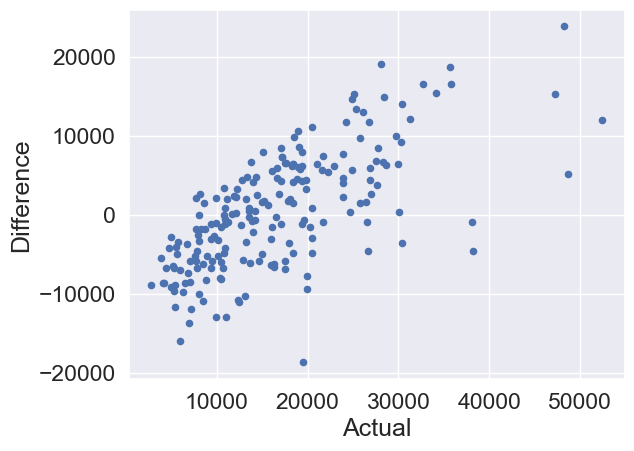

In [117]:
df.plot(kind='scatter', x='Actual', y='Difference', colormap='winter'); df['Difference'].mean()

In [120]:
np.abs(df['Difference']).mean() , np.square(df['Difference']).mean()
#squared error is more sensitive to outliers

(5946.1302000000005, 54685251.284889996)

<img src="met.png"> 

# cross validation on regression